In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

In [4]:
df = pd.read_csv( filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None, sep=',')
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class'] 

In [5]:
print(df.isnull().values.any())
df.dropna(how="all", inplace=True)

False


In [7]:
df.tail()

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [8]:
X = df.iloc[:,0:4].values 
y = df.iloc[:,4].values

In [9]:
from sklearn.preprocessing import StandardScaler 
X_std = StandardScaler().fit_transform(X)

In [11]:
mean_vec = np.mean(X_std, axis=0) 
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1) 
print('Covariance matrix \n%s' %cov_mat) 


Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [13]:
print('Covariance matrix \n') 
cov_mat= np.cov(X_std, rowvar=False) 
print('Covariance matrix \n%s' %cov_mat) 

Covariance matrix 

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [14]:
 cov_mat = np.cov(X_std.T) 
eig_vals, eig_vecs = np.linalg.eig(cov_mat) 
print('Eigenvectors \n%s' %eig_vecs) 
print('\nEigenvalues \n%s' %eig_vals)


Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [18]:
sq_eig=[] 
for i in eig_vecs:
    sq_eig.append(i**2) 
    print(sq_eig) 
val = sum(sq_eig) 
print("sum of squares of each values in an eigen vector is \n", val) 
for ev in eig_vecs: np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

[array([0.27287211, 0.13862096, 0.51986524, 0.06864169])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01])]
[array([0.27287211, 0.13862096, 0.51986524, 0.06864169]), array([0.06935581, 0.85665482, 0.05857991, 0.01540945]), array([3.37856219e-01, 4.44989610e-04, 1.98506285e-02, 6.41848163e-01]), array([0.31991586, 0.00427922, 0.40170422, 0.2741007 ])]
sum of squares of each values in an eigen vector is 
 [1. 1. 1. 1.]


In [37]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))] 
print(type(eig_pairs)) 
#Sort the (eigenvalue, eigenvector) tuples from high to low 
eig_pairs.sort()     
eig_pairs.reverse() 

for j in eig_pairs: 
    print(j[0])

<class 'list'>
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [43]:
eig_pairs = []
for i in range(len(eig_vals)):
    print(eig_vals[i],eig_vecs[:,i])
    eig_pairs.append( (np.abs(eig_vals[i]), eig_vecs[:,i]))
    
print(type(eig_pairs)) 


2.930353775589317 [ 0.52237162 -0.26335492  0.58125401  0.56561105]
0.9274036215173419 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
0.14834222648163944 [-0.72101681  0.24203288  0.14089226  0.6338014 ]
0.02074601399559593 [ 0.26199559 -0.12413481 -0.80115427  0.52354627]
<class 'list'>


In [45]:
print("\n",eig_pairs) 


print('\n\n\nEigenvalues in descending order:') 
for j in eig_pairs: 
    print(j[0])


 [(2.930353775589317, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])), (0.9274036215173419, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])), (0.14834222648163944, array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])), (0.02074601399559593, array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]



Eigenvalues in descending order:
2.930353775589317
0.9274036215173419
0.14834222648163944
0.02074601399559593


In [49]:
tot = sum(eig_vals) 
print("\n",tot) 
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)] 
print("\n\n1. Variance Explained\n",var_exp) 
cum_var_exp = np.cumsum(var_exp) 
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp) 
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2]) 
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))


 4.026845637583894


1. Variance Explained
 [72.77045209380135, 23.03052326768065, 3.683831957627379, 0.5151926808906321]


2. Cumulative Variance Explained
 [ 72.77045209  95.80097536  99.48480732 100.        ]


3. Percentage of variance the first two principal components each contain
  [72.77045209380135, 23.03052326768065]


4. Percentage of variance the first two principal components together contain
 95.800975361482


In [51]:
print(eig_pairs[0][1]) 
print(eig_pairs[1][1]) 
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1))) 
#hstack: Stacks arrays in sequence horizontally (column wise). print('Matrix W:\n', matrix_w)

[ 0.52237162 -0.26335492  0.58125401  0.56561105]
[-0.37231836 -0.92555649 -0.02109478 -0.06541577]


In [52]:
Y = X_std.dot(matrix_w) 
principalDf = pd.DataFrame(data = Y , columns = ['principal component 1', 'principal component 2']) 
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,-0.505704
1,-2.086426,0.655405
2,-2.367950,0.318477
3,-2.304197,0.575368
4,-2.388777,-0.674767


In [53]:
finalDf = pd.concat([principalDf,pd.DataFrame(y,columns = ['species'])], axis = 1) 
finalDf.head()

,principal component 1,principal component 2,species
0,-2.264542,-0.505704,Iris-setosa
1,-2.086426,0.655405,Iris-setosa
2,-2.367950,0.318477,Iris-setosa
3,-2.304197,0.575368,Iris-setosa
4,-2.388777,-0.674767,Iris-setosa


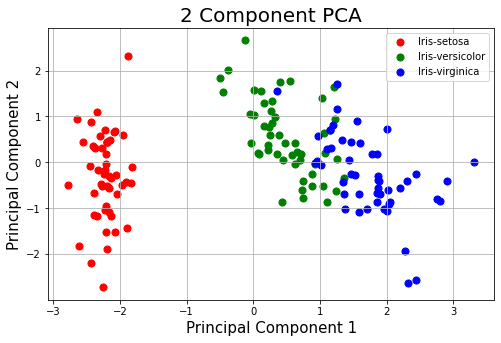

In [57]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 
colors = ['r', 'g', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['species'] == target  
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , finalDf.loc[indicesToKeep, 'principal component 2'] , c = color , s = 50) 
ax.legend(targets) 
ax.grid()

In [58]:
pca = PCA(n_components=2) 
# Here we can also give the percentage as a paramter to the PCA function as pca = PCA(.95). .95 means that we want to include 95% of the variance. Hence PCA will return the no of components which describe 95% of the variance. However we know from above computation that 2 components are enough so we have passed the 2 components.
principalComponents = pca.fit_transform(X_std) 
principalDf = pd.DataFrame(data = principalComponents , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5) # prints the top 5 rows

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [60]:
finalDf = pd.concat([principalDf, finalDf[['species']]], axis = 1) 
finalDf.head(5)

,principal component 1,principal component 2,species
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


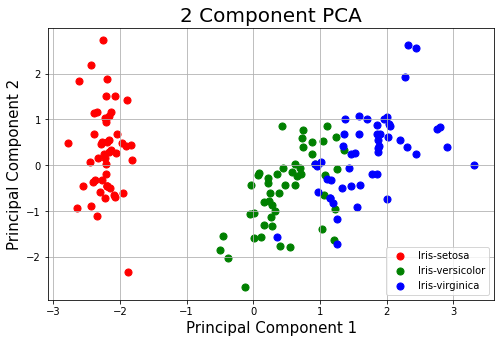

In [61]:
fig = plt.figure(figsize = (8,5)) 
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 Component PCA', fontsize = 20) 
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'] 
colors = ['r', 'g', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['species'] == target  
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] , finalDf.loc[indicesToKeep, 'principal component 2'] , c = color , s = 50) 
ax.legend(targets) 
ax.grid()